In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [15]:
def load_and_clean_data(filepath):
    data = pd.read_csv('Airline-Sentiment-2-w-AA.csv')
    data['msg_created'] = pd.to_datetime(data['msg_created'], errors='coerce', format='%m/%d/%y %H:%M')
    data['_last_judgment_at'] = pd.to_datetime(data['_last_judgment_at'], errors='coerce', format='%m/%d/%y %H:%M')
    data['user_timezone'] = data['user_timezone'].fillna('Unknown')
    return data

In [17]:
df = pd.read_csv('Airline-Sentiment-2-w-AA.csv')
# Display unique values of the 'airline' column
unique_airlines = df['airline'].unique()
print(unique_airlines)

['American' 'Virgin America' 'United' 'Southwest' 'Delta' 'US Airways']


In [20]:
# Function to analyze and visualize data for a specific airline
def sentiment_analysis(data, airline_name):
    # Filter data for the specified airline
    airline_data = data[data['airline'].str.lower() == airline_name.lower()]

    # Sentiment distribution for the specified airline
    sentiment_counts = airline_data['airline_sentiment'].value_counts()
    sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
    plt.title(f'Sentiment Distribution for {airline_name}')
    plt.ylabel('')
    plt.show()

    # Word Cloud for the specified airline
    text = ' '.join(airline_data['text'])
    wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {airline_name}')
    plt.axis('off')
    plt.show()

Please enter the name of the airline for sentiment analysis: united


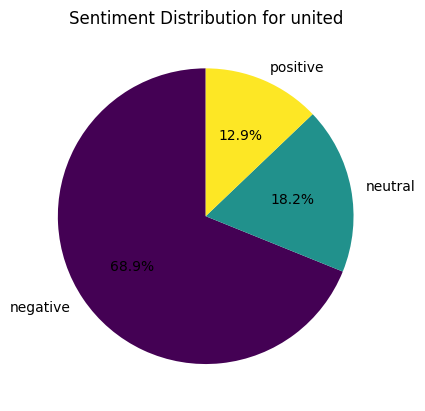

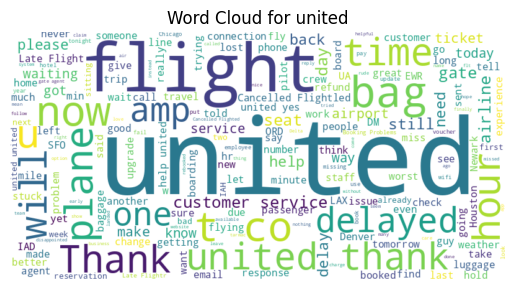

In [21]:
# Main function to run the analysis
def main():
    filepath = '/mnt/data/Airline-Sentiment-2-w-AA.csv'  # Adjust the path if necessary
    data = load_and_clean_data(filepath)

    # Prompt the user for an airline name
    airline_name = input("Please enter the name of the airline for sentiment analysis: ")
    sentiment_analysis(data, airline_name)


if __name__ == "__main__":
    main()